Imports & Environment Setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Display settings for readability
sns.set_style('whitegrid')
pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:,.2f}'.format

Data Loading

In [2]:
# Load the dataset
try:
    df = pd.read_csv('dataset.csv')
    print("Dataset loaded successfully.")
except FileNotFoundError:
    print("Error: 'dataset.csv' not found.")
    df = pd.DataFrame()

Dataset loaded successfully.


Initial Data Inspection

In [3]:
# Quick look at the data if loaded
if not df.empty:
    print("--- DataFrame Shape ---")
    print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")
    print("--- DataFrame Info ---")
    df.info()
    print("--- First 5 Rows ---")
    display(df.head())

--- DataFrame Shape ---
Rows: 383, Columns: 17
--- DataFrame Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383 entries, 0 to 382
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Age                   383 non-null    int64 
 1   Gender                383 non-null    object
 2   Smoking               383 non-null    object
 3   Hx Smoking            383 non-null    object
 4   Hx Radiothreapy       383 non-null    object
 5   Thyroid Function      383 non-null    object
 6   Physical Examination  383 non-null    object
 7   Adenopathy            383 non-null    object
 8   Pathology             383 non-null    object
 9   Focality              383 non-null    object
 10  Risk                  383 non-null    object
 11  T                     383 non-null    object
 12  N                     383 non-null    object
 13  M                     383 non-null    object
 14  Stage               

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No
1,34,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
2,30,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
3,62,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
4,62,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent,No


Target Variable Distribution (Recurred)

--- Target Variable Distribution ---
Recurred
No    71.80
Yes   28.20
Name: proportion, dtype: float64


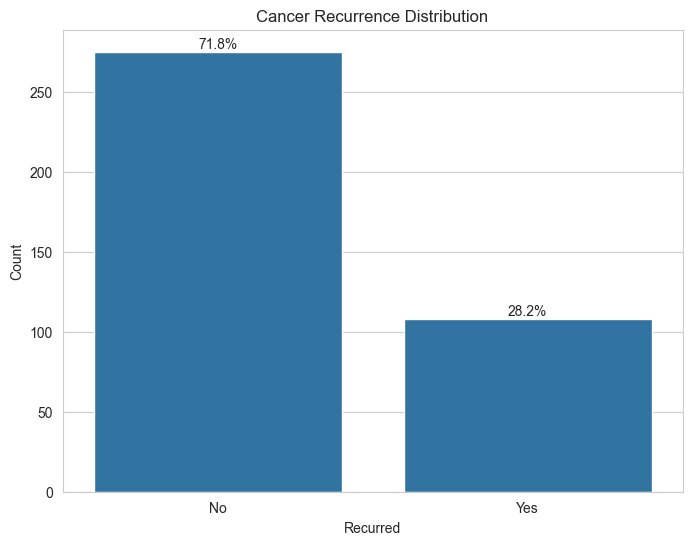

In [4]:
# Show target variable distribution and visualize
if 'Recurred' in df.columns:
    recurred_distribution = df['Recurred'].value_counts(normalize=True) * 100
    print("--- Target Variable Distribution ---")
    print(recurred_distribution)
    plt.figure(figsize=(8, 6))
    sns.countplot(x='Recurred', data=df)
    plt.title('Cancer Recurrence Distribution')
    plt.ylabel('Count')
    plt.xlabel('Recurred')
    ax = plt.gca()
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width()/2., height + 2, f'{height/len(df)*100:.1f}%', ha="center")
    plt.show()

Inspect Unique Values of All Features

In [5]:
# Show unique values for each column
print("--- Unique Values in Each Column ---")
for col in df.columns:
    if df[col].dtype == 'object' or df[col].nunique() < 20:
        print(f"\n{col}: {df[col].unique()}")
    else:
        print(f"\n{col}: Numeric ({df[col].dtype})")

--- Unique Values in Each Column ---

Age: Numeric (int64)

Gender: ['F' 'M']

Smoking: ['No' 'Yes']

Hx Smoking: ['No' 'Yes']

Hx Radiothreapy: ['No' 'Yes']

Thyroid Function: ['Euthyroid' 'Clinical Hyperthyroidism' 'Clinical Hypothyroidism'
 'Subclinical Hyperthyroidism' 'Subclinical Hypothyroidism']

Physical Examination: ['Single nodular goiter-left' 'Multinodular goiter'
 'Single nodular goiter-right' 'Normal' 'Diffuse goiter']

Adenopathy: ['No' 'Right' 'Extensive' 'Left' 'Bilateral' 'Posterior']

Pathology: ['Micropapillary' 'Papillary' 'Follicular' 'Hurthel cell']

Focality: ['Uni-Focal' 'Multi-Focal']

Risk: ['Low' 'Intermediate' 'High']

T: ['T1a' 'T1b' 'T2' 'T3a' 'T3b' 'T4a' 'T4b']

N: ['N0' 'N1b' 'N1a']

M: ['M0' 'M1']

Stage: ['I' 'II' 'IVB' 'III' 'IVA']

Response: ['Indeterminate' 'Excellent' 'Structural Incomplete'
 'Biochemical Incomplete']

Recurred: ['No' 'Yes']


Feature Encoding

In [6]:
# Encode categorical features
df_encoded = df.copy()
binary_cols = ['Gender', 'Smoking', 'Hx Smoking', 'Hx Radiothreapy', 'Focality', 'M']
for col in binary_cols:
    if 'F' in df_encoded[col].unique():
        mapping = {'F': 0, 'M': 1}
    elif 'Uni-Focal' in df_encoded[col].unique():
        mapping = {'Uni-Focal': 0, 'Multi-Focal': 1}
    elif 'M0' in df_encoded[col].unique():
        mapping = {'M0': 0, 'M1': 1}
    else:
        mapping = {'No': 0, 'Yes': 1}
    df_encoded[col] = df_encoded[col].map(mapping)

# Ordinal encoding for ordered categories
df_encoded['Risk'] = df_encoded['Risk'].map({'Low': 0, 'Intermediate': 1, 'High': 2})
df_encoded['T'] = df_encoded['T'].map({'T1a': 0, 'T1b': 1, 'T2': 2, 'T3a': 3, 'T3b': 4, 'T4a': 5, 'T4b': 6})
df_encoded['N'] = df_encoded['N'].map({'N0': 0, 'N1a': 1, 'N1b': 2})
df_encoded['Stage'] = df_encoded['Stage'].map({'I': 0, 'II': 1, 'III': 2, 'IVA': 3, 'IVB': 4})

# One-hot encoding for nominal features
nominal_cols = ['Thyroid Function', 'Physical Examination', 'Adenopathy', 'Pathology', 'Response']
df_encoded = pd.get_dummies(df_encoded, columns=nominal_cols, drop_first=True, dtype=int)

# Encode target variable
df_encoded['Recurred'] = df_encoded['Recurred'].map({'No': 0, 'Yes': 1})

print("--- Encoded Data Preview ---")
display(df_encoded.head())
print("--- Encoded Data Info ---")
df_encoded.info()

--- Encoded Data Preview ---


,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Focality,Risk,T,N,M,Stage,Recurred,Thyroid Function_Clinical Hypothyroidism,Thyroid Function_Euthyroid,Thyroid Function_Subclinical Hyperthyroidism,Thyroid Function_Subclinical Hypothyroidism,Physical Examination_Multinodular goiter,Physical Examination_Normal,Physical Examination_Single nodular goiter-left,Physical Examination_Single nodular goiter-right,Adenopathy_Extensive,Adenopathy_Left,Adenopathy_No,Adenopathy_Posterior,Adenopathy_Right,Pathology_Hurthel cell,Pathology_Micropapillary,Pathology_Papillary,Response_Excellent,Response_Indeterminate,Response_Structural Incomplete
0,27,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0
1,34,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0
2,30,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0
3,62,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0
4,62,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0


--- Encoded Data Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383 entries, 0 to 382
Data columns (total 31 columns):
 #   Column                                            Non-Null Count  Dtype
---  ------                                            --------------  -----
 0   Age                                               383 non-null    int64
 1   Gender                                            383 non-null    int64
 2   Smoking                                           383 non-null    int64
 3   Hx Smoking                                        383 non-null    int64
 4   Hx Radiothreapy                                   383 non-null    int64
 5   Focality                                          383 non-null    int64
 6   Risk                                              383 non-null    int64
 7   T                                                 383 non-null    int64
 8   N                                                 383 non-null    int64
 9   M                

Model Development & Training

In [7]:
# Prepare data for modeling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df_encoded.drop('Recurred', axis=1)
y = df_encoded['Recurred']

# Scale 'Age' feature
X_scaled = X.copy()
scaler = StandardScaler()
X_scaled['Age'] = scaler.fit_transform(X_scaled[['Age']])

print("--- 'Age' Feature Scaled ---")
display(X_scaled.head())

# Stratified train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("--- Data Splitting Complete ---")
print(f"Train shape: {X_train.shape}, Test shape: {X_test.shape}")
print("Train 'Recurred' distribution:")
print(y_train.value_counts(normalize=True))
print("Test 'Recurred' distribution:")
print(y_test.value_counts(normalize=True))

--- 'Age' Feature Scaled ---


,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Focality,Risk,T,N,M,Stage,Thyroid Function_Clinical Hypothyroidism,Thyroid Function_Euthyroid,Thyroid Function_Subclinical Hyperthyroidism,Thyroid Function_Subclinical Hypothyroidism,Physical Examination_Multinodular goiter,Physical Examination_Normal,Physical Examination_Single nodular goiter-left,Physical Examination_Single nodular goiter-right,Adenopathy_Extensive,Adenopathy_Left,Adenopathy_No,Adenopathy_Posterior,Adenopathy_Right,Pathology_Hurthel cell,Pathology_Micropapillary,Pathology_Papillary,Response_Excellent,Response_Indeterminate,Response_Structural Incomplete
0,-0.92,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0
1,-0.45,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0
2,-0.72,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0
3,1.40,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0
4,1.40,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0


--- Data Splitting Complete ---
Train shape: (306, 30), Test shape: (77, 30)
Train 'Recurred' distribution:
Recurred
0   0.72
1   0.28
Name: proportion, dtype: float64
Test 'Recurred' distribution:
Recurred
0   0.71
1   0.29
Name: proportion, dtype: float64


Model Training (XGBoost)

In [8]:
# Train XGBoost model
import xgboost as xgb
from sklearn.metrics import classification_report, accuracy_score

print("--- Training XGBoost Model ---")
scale_pos_weight = y_train.value_counts()[0] / y_train.value_counts()[1]
print(f"scale_pos_weight: {scale_pos_weight:.2f}")

xgb_clf = xgb.XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    scale_pos_weight=scale_pos_weight,
    use_label_encoder=False,
    random_state=42
)
xgb_clf.fit(X_train, y_train)
print("--- Model Training Complete ---")

--- Training XGBoost Model ---
scale_pos_weight: 2.56
--- Model Training Complete ---


Model Evaluation

In [9]:
# Evaluate model
print("--- Evaluating Model ---")
y_pred = xgb_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f} ({accuracy*100:.2f}%)")
print("--- Classification Report ---")
print(classification_report(y_test, y_pred, target_names=['No Recurrence (0)', 'Recurrence (1)']))

--- Evaluating Model ---
Accuracy: 0.9740 (97.40%)
--- Classification Report ---
                   precision    recall  f1-score   support

No Recurrence (0)       0.98      0.98      0.98        55
   Recurrence (1)       0.95      0.95      0.95        22

         accuracy                           0.97        77
        macro avg       0.97      0.97      0.97        77
     weighted avg       0.97      0.97      0.97        77

